# 서울의 기온 데이터 분석

* https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70

* 기온분석>
    * 자료구분:일,
    * 자료형태:기본,
    * 기간: ~ 현재, 
    * 지역: 서울
* CSV 파일 형태로 다운

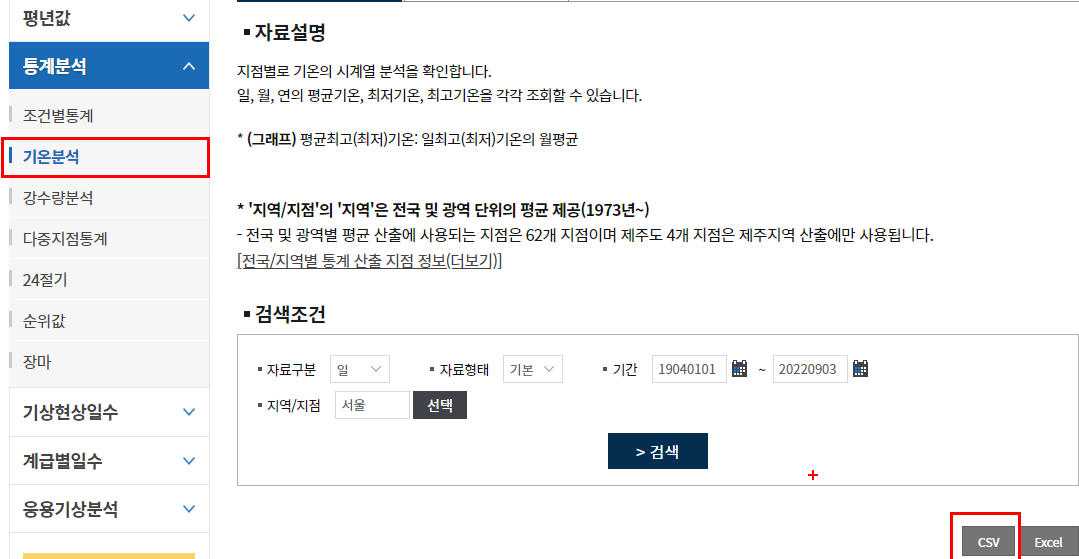

### 데이터에 대한 질문

* 서울이 가장 더웠던 날은 언제였을까? 얼마나 더웠을까?
* 일교차가 가장 큰 시기는 1년 중 언제쯤일까?
* 겨울에는 언제 가장 추울까? 12월? 1월? 2월?
* 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 1년 중 얼마나 있을까?

## 라이브러리 로드

In [1]:
!pip install matplotlib

In [23]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# #코랩의 경우
# # 나눔고딕 폰트 인스톨
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## 데이터 로드

In [5]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102520.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 5


In [7]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102520.csv', header=6) # 불러드릴 row위치 지정
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


> * 인코딩 에러 -> 편집기에서 인코딩(utf-8)로 명시적으로 지정 후, 저장해서 다시 판다스로 로드
> * Parse 에러(메모장사용시) -> 데이터의 윗부분의 텍스트를 로드할 때 해석하지 못하는 문자열이 있어서  에러발생-> header=6
> * UTF-8로 변환시 사용했던 편집기에 따라 상의한 결과-> header 숫자를 적절하게 조정

> * 보통 한글에서 사용하는 인코딩 종류(utf-8, euc-kr, cp949, utf-8-sig)

In [8]:
# 데이터 로드, 인코딩, header,sep 등 필요한 파라미터 사용
df = pd.read_csv('./data/ta_20220920102259.csv', header=6, encoding='euc-kr') # default: utf-8,
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/ta_20220920102259.csv'

## 데이터 살펴보기

* 데이터 사이즈 (행수, 컬럼수)
* 컬럼 이름과 타입
* 결측치 유무
* 통계정보

In [9]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  40806 non-null  float64
 3   최저기온(℃)  40803 non-null  float64
 4   최고기온(℃)  40803 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


> * 데이터수: 41562건
> * 컬럼수와 이름: 5개
> * 컬럼 타임: 날짜-> str, 기온: 실수
> * 결측치 유무: 기온 컬럼에 대해서는 결측치 존재 -> 어떻게?

In [11]:
df.describe() # 숫자형 컬럼에만 국한

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41562.0,40806.000000,40803.000000,40803.000000
mean,108.0,11.781135,7.490523,16.784746
std,0.0,10.662868,10.891121,10.980128
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.725000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.200000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 결측 데이터 전처리

### 결측데이터수 파악하기

In [12]:
df.isnull().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

### 평균기온, 최저기온, 최고 기온 결측치인 날짜 찾음

In [13]:
df['평균기온(℃)'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 평균기온(℃), Length: 41562, dtype: bool

In [14]:
# 평균기온, 최저기온, 최고 기온의 결측치인 날짜 찾음
df[df['평균기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16427,1953-11-26,108,NaN,NaN,NaN
16428,1953-11-27,108,NaN,NaN,NaN
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN


> * 1950년대에는 전쟁중이어서 관측 불가

In [15]:

df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [16]:
# 2017년에도 결측치 있네...
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


### 결측치 데이터 처리
* 분석 목적과 도메인의 영향이 큼


In [17]:
# 평균기온은 0, 최저기온은 999, 최고기온은 -999로 채움

df['평균기온(℃)'] = df['평균기온(℃)'].fillna(0)
df['최저기온(℃)'] = df['최저기온(℃)'].fillna(999)
df['최고기온(℃)'] = df['최고기온(℃)'].fillna(-999)


In [18]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41562 entries, 0 to 41561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41562 non-null  object 
 1   지점       41562 non-null  int64  
 2   평균기온(℃)  41562 non-null  float64
 3   최저기온(℃)  41562 non-null  float64
 4   최고기온(℃)  41562 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [25]:
df['날짜'].str.contains('1950')

0        False
1        False
2        False
3        False
4        False
         ...  
41557    False
41558    False
41559    False
41560    False
41561    False
Name: 날짜, Length: 41562, dtype: bool

In [26]:
#결측치였던 1950년대 데이터가 어떻게 바뀌었는지 확인
df[ df['날짜'].str.contains('1950') ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15433,1950-01-01,108,2.8,0.7,4.5
15434,1950-01-02,108,-0.1,-3.8,2.4
15435,1950-01-03,108,-4.6,-7.3,-0.7
15436,1950-01-04,108,-7.7,-11.2,-4.2
15437,1950-01-05,108,-7.0,-11.6,-3.1
...,...,...,...,...,...
15727,1950-10-27,108,0.0,999.0,-999.0
15728,1950-10-28,108,0.0,999.0,-999.0
15729,1950-10-29,108,0.0,999.0,-999.0
15730,1950-10-30,108,0.0,999.0,-999.0


In [27]:
df[(df['최저기온(℃)']==-999)| (df['최고기온(℃)']==999) | (df['평균기온(℃)']==0)]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
165,1908-03-14,108,0.0,-5.2,6.7
410,1908-11-14,108,0.0,-2.9,3.4
523,1909-03-07,108,0.0,-5.0,6.4
1142,1910-11-16,108,0.0,-4.2,6.7
1962,1913-02-13,108,0.0,-4.0,4.6
...,...,...,...,...,...
38343,2013-11-27,108,0.0,-4.3,4.7
39155,2016-02-17,108,0.0,-5.2,5.4
40177,2018-12-05,108,0.0,-4.3,3.4
40188,2018-12-16,108,0.0,-2.6,2.1


## 컬럼명 바꾸기

## 서울에서 가장 더웠던 날은?

In [ ]:
#최고 더운 날은?


In [18]:
# 서울에서 가장 더웠던 날은? 2018-08-01: 39.6도 출력


서울에서 가장 더웠던 날은? 2018-08-01 : 39.6도


# 내 생일날 기온변화 그래프 그리기

## 내 생일날 기온변화 그래프 그리기(평균기온 기준)
* 데이터 로딩
* 결측 데이터 전처리
* 내 생일 데이터만 추출
* 필요한 컬럼만 추출 or 불필요한 데이터 삭제
* 그래프 그리기

In [26]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102520.csv', header=6)
df.head()

# 결측치 처리
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온',
                   df.columns[4]:'최고기온'}, inplace=True)



## 내 생일 데이터만 추출

In [20]:
# 어떤 컬럼을 기준으로 내생일 기온그래프를 그릴껀지 고민
# 내 생일 데이터만 추출

birthday = df[df['날짜'].str.contains('06-28')]


In [21]:
birthday.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
271,1908-06-28,108,20.6,19.5,23.0
636,1909-06-28,108,21.8,19.3,25.9
1001,1910-06-28,108,19.0,12.8,25.3
1366,1911-06-28,108,20.5,17.7,25.3
1732,1912-06-28,108,22.1,17.4,28.8


## 필요한 컬럼만 추출

In [ ]:
# 필요한 컬럼만 추출




In [ ]:
# 내 생일 데이터 그래프 그리기
import matplotlib.pyplot as plt

plt.plot(birthday['날짜'], birthday['평균기온'])


## 결측 데이터 재 처리

> * 평균 기온이 0인 데이터 어떻게 처리 할 것인가?
> * 결측치를 삭제하는 것으로 처리

In [30]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220920102520.csv', header=6)
df.head()

# 결측치 처리
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온',
                   df.columns[4]:'최고기온'}, inplace=True)

In [29]:
# 결측 데이터 삭제
df.dropna(inplace=True)

## 내가 태어난 이 후의 데이터만 추출해서 살펴보기

In [ ]:
# 내 생일이면서, 1980년 이후의 데이터만 추출


In [42]:
# 필요한 컬럼만 추출


In [ ]:
# 내 생일 데이터 그래프 그리기


## 내가 태어난 날 -> 날짜 형식으로 변환하고 데이터 추출하고 보기

### 날짜 컬럼 Dtype 확인

In [ ]:
# 날짜 컬럼 타입 확인


### object -> datetime64[ns] 형변환

In [ ]:
# 날짜 데이터 Str => date 형으로 변환


### 내 생일이면서 1980년 이후의 데이터만 추출

In [53]:
# 내 생일이면서, 1980년 이후의 데이터만 추출


In [ ]:
# 필요한 컬럼만 추출



## 그래프 그리기

In [ ]:
# 내 생일 데이터 그래프 그리기


In [ ]:
# X축에 날짜가 나오도록해서 다시 출력


# 매년 크리스마스의 최고 기온과 최저 기온의 추이를 그려보자. 

# 같은 데이타, 다른 그래프, 새로운 분석
* 서울 최고 기온 데이터 전체를 나타낸 lineplot을 보고 어떤 정보를 얻었나요?

##  line:서울 최고 기온 그래프

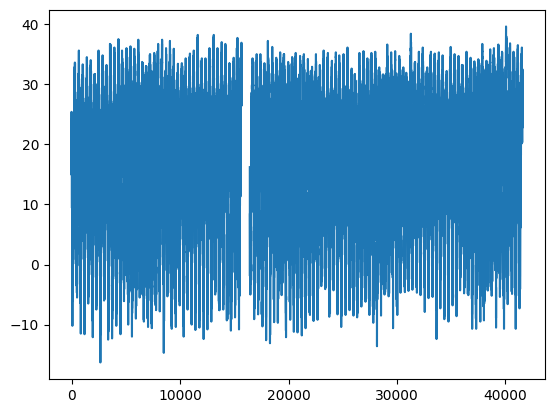

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102520.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

plt.plot(df['최고기온'])
plt.show()

> * 최고 기온 데이터 전체를 그래프로 나타냈는데, 결측치 존재 말고는 특별한 정보를 얻을 수 없습니다. 
> * 다른 관점으로 데이터를 바라보기 위해서
> * 다른 종류의 시각화를 시도해 봅시다. 

## hist:기온 데이터를 히스토그램으로 표현하기

* 특정구간의 자료의 수를 표현할때

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20210103160419.csv',header=7)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)



## hist:겨울과 여름 계절의 패턴인가? 그럼 8월만 데이터를 뽑아보자.
* 역대 8월의 최고 온도는?
* 최고 기온의 분포(최저 ~ 최고)는?

In [ ]:
# hist(데이터,몇개구간,색깔)


## hist:1월과 8월의 데이터를 히스토그램으로 시각화하기


In [71]:

# 8월 데이터만 추출


# 1월 데이터만 추출


> * 같은 데이터에서 어떤 내용을 추출하여, 어떤 방법으로 시각화하는냐에 따라 새로운 정보를 발견할 수 있습니다. 
> * 1,8월 이외에 궁금한 달이 있다면 도전!

## box:기온 데이터 대략적인 통계정보 확인하기

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102520.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)


# 결측 데이터 삭제
df.dropna(inplace=True)


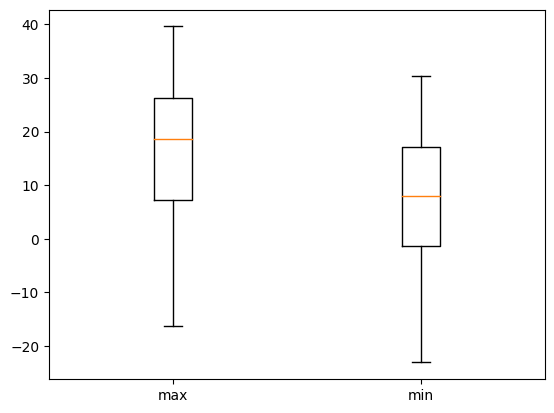

In [40]:
plt.boxplot([df['최고기온'], df['최저기온']], labels=['max', 'min'])
plt.show()

In [35]:
df['최고기온'].describe()

count    40802.000000
mean        16.784462
std         10.980112
min        -16.300000
25%          7.300000
50%         18.600000
75%         26.300000
max         39.600000
Name: 최고기온, dtype: float64

## 월별 기온 데이터

1. 데이터를 월별로 조회하고, 결과를 리스트에 담는다.
2. 월별 데이터를 box plot으로 그래프 그린다. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220920102520.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')